<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1:-Calculating-Divergence-and-Curl" data-toc-modified-id="Part-1:-Calculating-Divergence-and-Curl-1">Part 1: Calculating Divergence and Curl</a></span><ul class="toc-item"><li><span><a href="#Calculating-Curl" data-toc-modified-id="Calculating-Curl-1.1">Calculating Curl</a></span></li><li><span><a href="#Calculating-Divergence" data-toc-modified-id="Calculating-Divergence-1.2">Calculating Divergence</a></span></li></ul></li><li><span><a href="#Part-2:-Explore-Divergence-and-Curl" data-toc-modified-id="Part-2:-Explore-Divergence-and-Curl-2">Part 2: Explore Divergence and Curl</a></span></li><li><span><a href="#Part-3:-Exploring-Gradient,-Div,-and-Curl" data-toc-modified-id="Part-3:-Exploring-Gradient,-Div,-and-Curl-3">Part 3: Exploring Gradient, Div, and Curl</a></span></li><li><span><a href="#Notes:-Applied-Mathematics-for-AI" data-toc-modified-id="Notes:-Applied-Mathematics-for-AI-4">Notes: Applied Mathematics for AI</a></span></li><li><span><a href="#Notes:-Internships-/-Job-Expectations" data-toc-modified-id="Notes:-Internships-/-Job-Expectations-5">Notes: Internships / Job Expectations</a></span></li><li><span><a href="#Notes:-How-Not-To-Die-From-Working" data-toc-modified-id="Notes:-How-Not-To-Die-From-Working-6">Notes: How Not To Die From Working</a></span></li><li><span><a href="#Notes:-Derivative-Vector-Identities" data-toc-modified-id="Notes:-Derivative-Vector-Identities-7">Notes: Derivative Vector Identities</a></span></li></ul></div>

Exploring Div, Curl, and Grad

__Goals:__

1) Use Python to calculate divergence and curl of 2D vector functions.

2) Explore the relationships between a vector field, its divergence, its curl, and the divergence of its curl.

3) Review the relationships between a scalar field, its gradient vector field, the divergence of its gradient, and the curl of its gradient.

## Part 1: Calculating Divergence and Curl

Use the various tools and resources available to you to learn how to calculate divergence and curl in Python (with SymPy in particular). Include some notes that will be helpful to you in the blue space below.

https://docs.sympy.org/latest/modules/physics/vector/api/fieldfunctions.html
https://docs.sympy.org/latest/modules/physics/vector/fields.html
https://docs.sympy.org/latest/modules/vector/api/vectorfunctions.html

Explanation of syntax and Sympy `ReferenceFrame` object:
https://stackoverflow.com/questions/30378676/calculate-curl-of-a-vector-field-in-python-and-plot-it-with-matplotlib

Suppose you have:
$$\vec{F} = (y^2z,-xy,z^2) = (y^2z) \vec{x} - (xy) \vec{y} + (z^2) \vec{z}$$ 

or equivalently 

$$\vec{F} = (y^2z,-xy,z^2) = (y^2z) \hat{i} - (xy) \hat{j} + (z^2) \hat{k}$$ 

then `y` would be `R[1]`, `x` is `R[0]` and `z` is `R[2]` while the vectors of the 3 axes would be `R.x` (i), `R.y` (j), `R.z` (k) and the code to calculate the vector field curl is:

### Calculating Curl

In [44]:
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import curl
from sympy import init_printing
init_printing()


R = ReferenceFrame('R')

F = R[1]**2 * R[2] * R.x - R[0]*R[1] * R.y + R[2]**2 * R.z

G = curl(F, R)  

In [45]:
F

In [46]:
G

### Calculating Divergence

In [47]:
from sympy.physics.vector import *

H = divergence(F, R)

In [48]:
H

__Afterthoughts / Notes:__ This can get pretty confusing, visually. Reference frames will make this easier in the future.

$R[0] = R_x = x$

$R[1] = R_y = y$

$R[2] = R_z = z$

<br /><br />

$R.x = \hat{r}_x = \hat{i}$

$R.y = \hat{r}_y = \hat{j}$

$R.z = \hat{r}_z = \hat{k}$

## Part 2: Explore Divergence and Curl

Consider

$$\vec{F} = (x, 0) = (x)\hat{i} + 0\hat{j}$$

$$\vec{F} = (x, 0) = (x)\hat{i}$$

Take its Divergence, print the result.

Take its Curl, assign it to the variable `curl1`.

In [17]:
from sympy.physics.vector import *
from sympy import init_printing
init_printing()

R = ReferenceFrame('R')

F = R.x * R[0] + 0 * R[1]

H = divergence(F, R)

In [18]:
H

In [20]:
curl1 = curl(F, R)
curl1

In [21]:
curl2 = 0 * R[0] + 0 * R[1] + curl1 * R[2]
curl2

In [22]:
divergence(curl2, R)

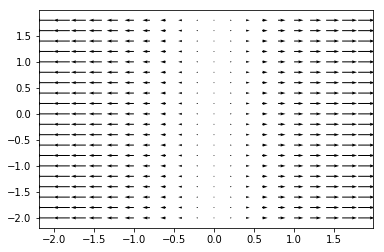

In [32]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.gca()

x = np.arange(-2, 2, 0.2)
y = np.arange(-2, 2, 0.2)
x, y = np.meshgrid(x, y)

u = x
v = 0*y

ax.quiver(x, y, u, v)

plt.show()

<IPython.core.display.Javascript object>


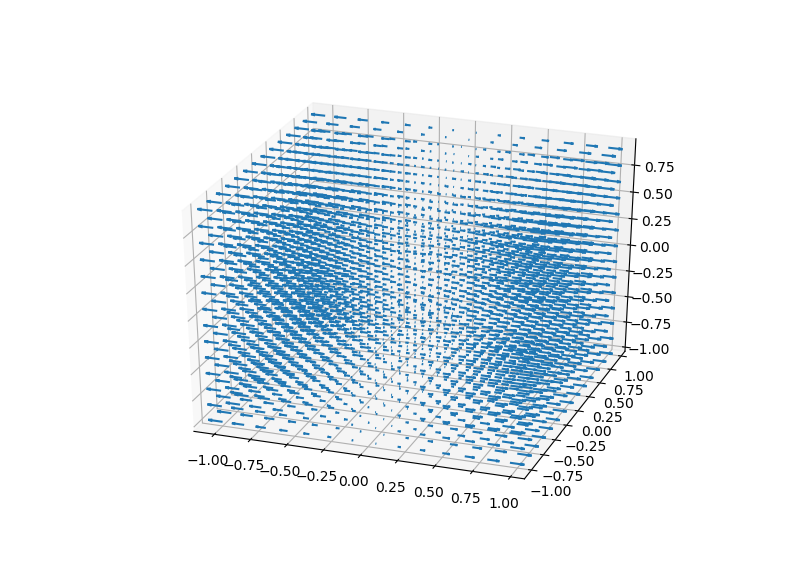

In [31]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook

fig = plt.figure(figsize=(8, 5))
ax = fig.gca(projection='3d')

x, y, z = np.meshgrid(np.arange(-1, 1, 0.15),
                   np.arange(-1, 1, 0.15),
                   np.arange(-1, 1, 0.15))

u = x
v = 0
w = 0

ax.quiver(x, y, z, u, v, w, length=0.1)

plt.show()

Gee whiz, Mathematica sure does make this process a whole lot tighter. But, we must move on! Can't bank on a blackbox paid service out in the wilderness.

## Part 3: Exploring Gradient, Div, and Curl

Explorations: use the above code and modify as needed for the following vector functions. As needed, change the plotting scale, and change the number of VectorPoints (in many cases, the default should be fine) to produce plots that show the features. In a separate document, copy and paste each plot, and make sure to clearly record the vector function, the divergence, the curl vector function, and the divergence of the curl as discussed in the pre-lab lecture.

a) ${x, 0}$

b) ${x^2, 0}$

c) ${0, y}$

d) ${0, y^2}$

e) ${x, y}$

f) ${y, x}$

g) ${x, x}$

h) ${y, y}$

i) ${-x, y}$

j) ${-y, x}$

k) ${0, e^{-y^2}}$

l) ${0, e^{-x^2}}$

m) ${Cos(x), 0}$

n) ${Cos(y), 0}$

In [2]:
from sympy.physics.vector import *

from sympy import *
from sympy import lambdify
init_printing()

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np

x, y = symbols('x y')

def make_bases(x, y):
    bases = np.asarray(
            [[x, 0],
            [x**2, 0],
            [0, y],
            [0, y**2],
            [x, y],
            [y, x],
            [x, x],
            [y, y],
            [-x, y],
            [-y, x],
            [0, E**(-y**2)],
            [0, E**(-x**2)],
            [cos(x), 0],
            [cos(y), 0]])
    return bases

In [3]:
#make_bases(x, y)

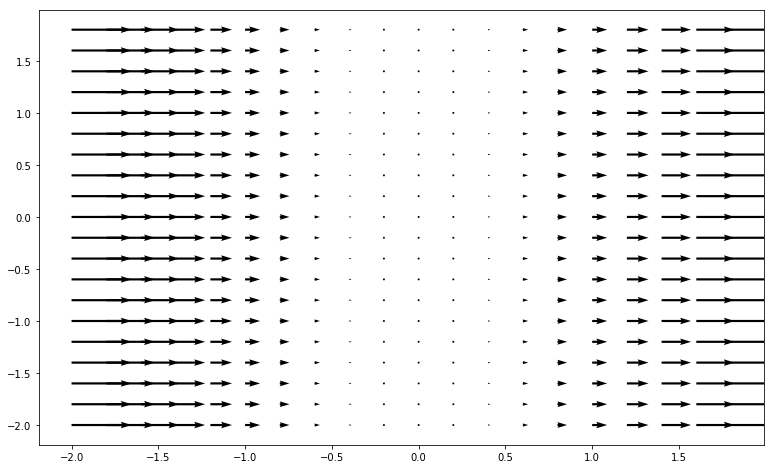

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

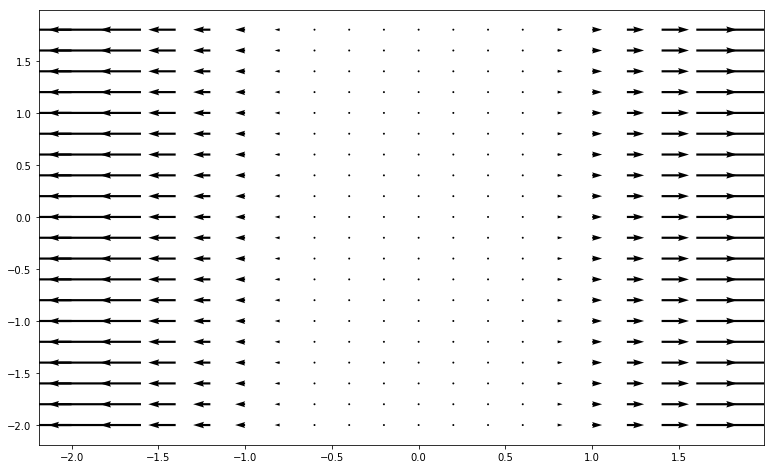

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

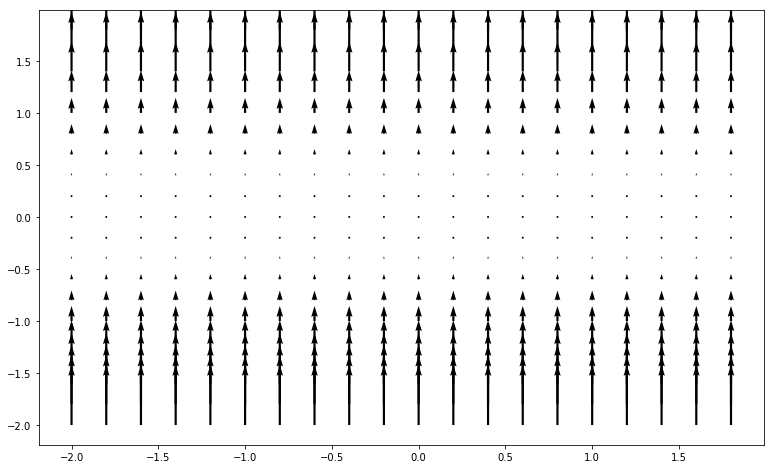

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

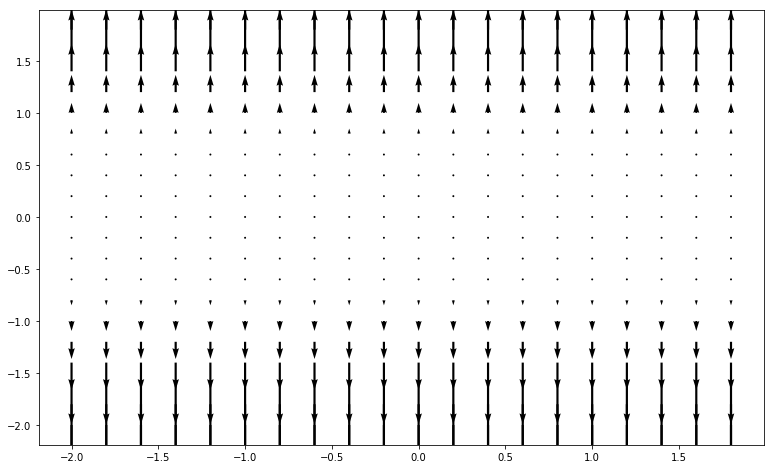

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

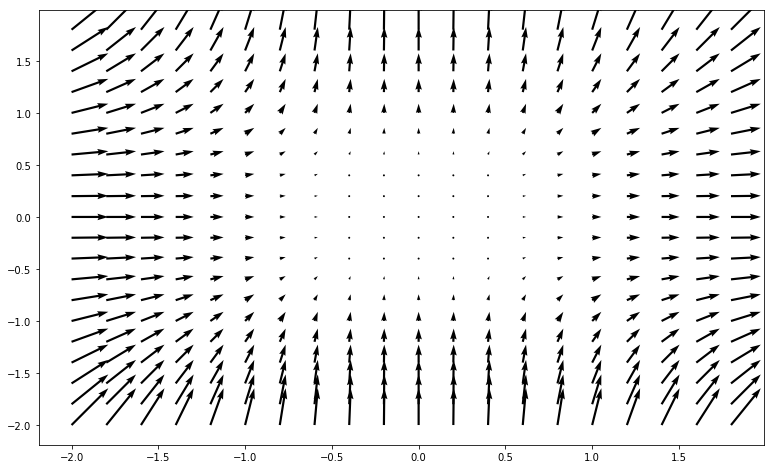

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

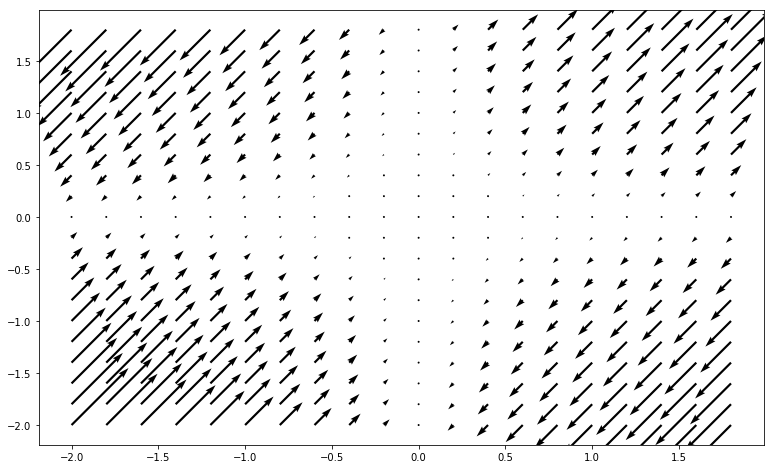

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

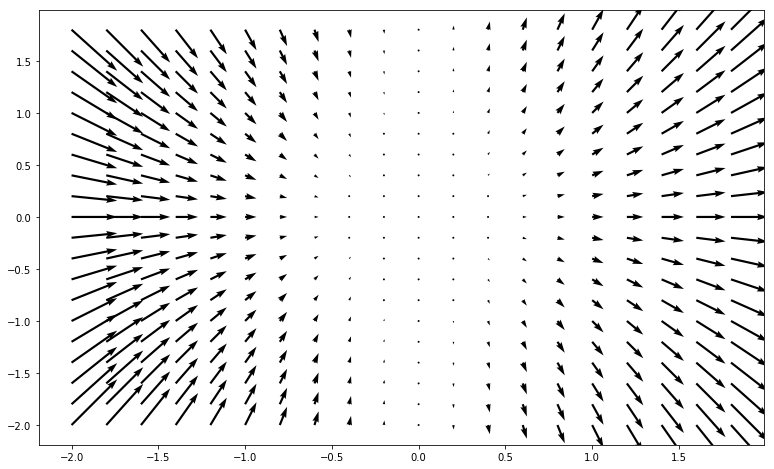

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

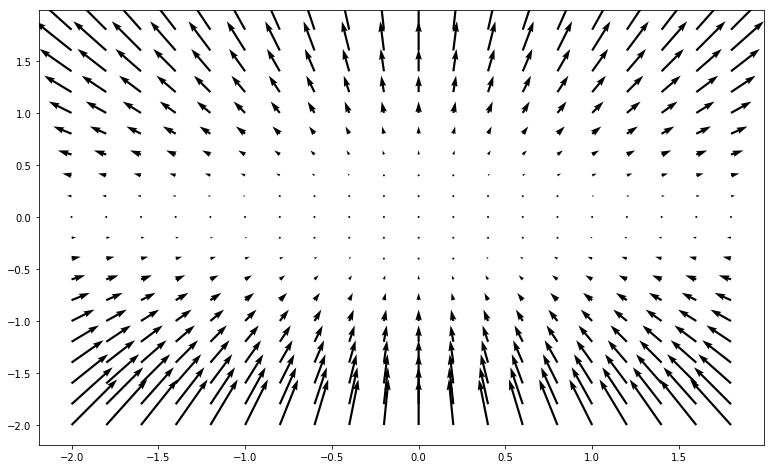

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

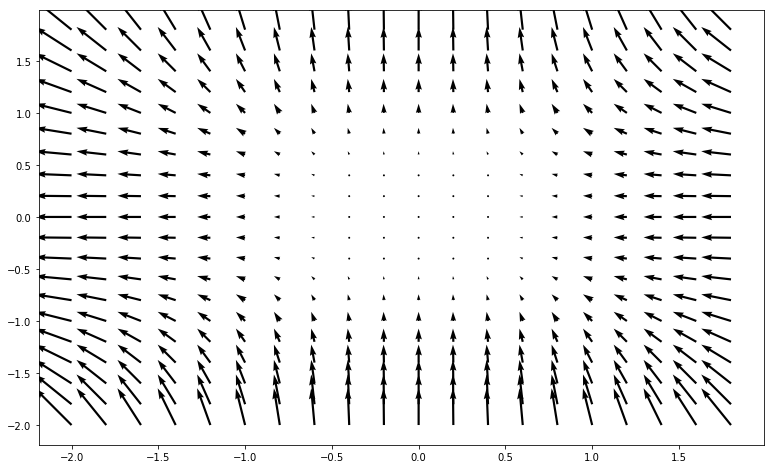

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

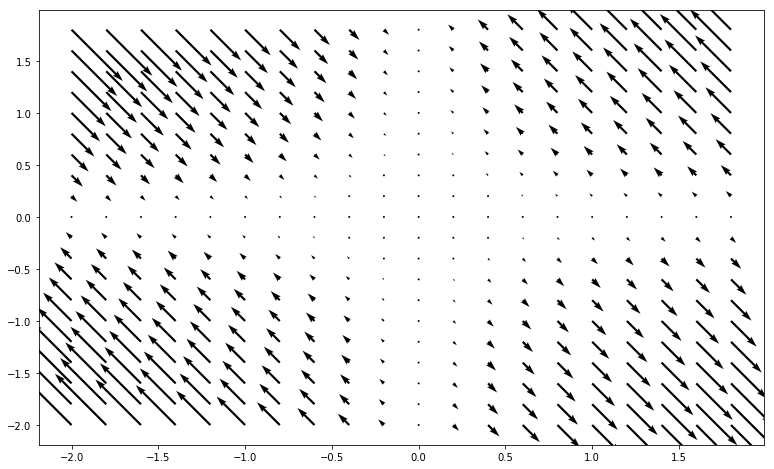

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

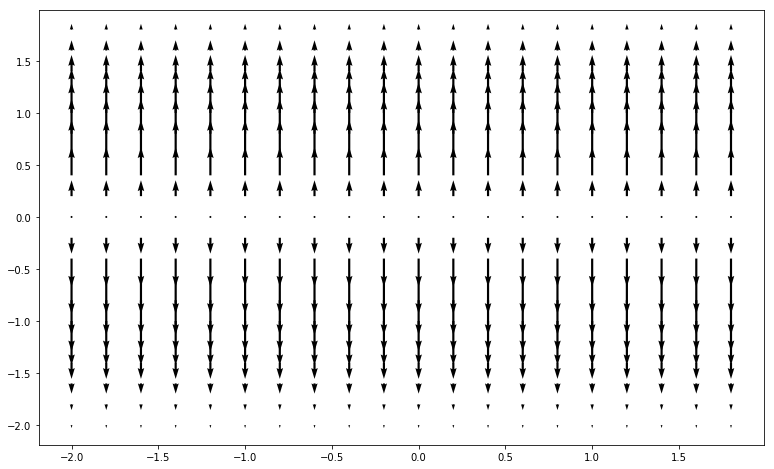

'F = '

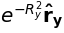

'div(F) = '

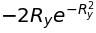

'curl(F) = '

'div(curl(F)) = '

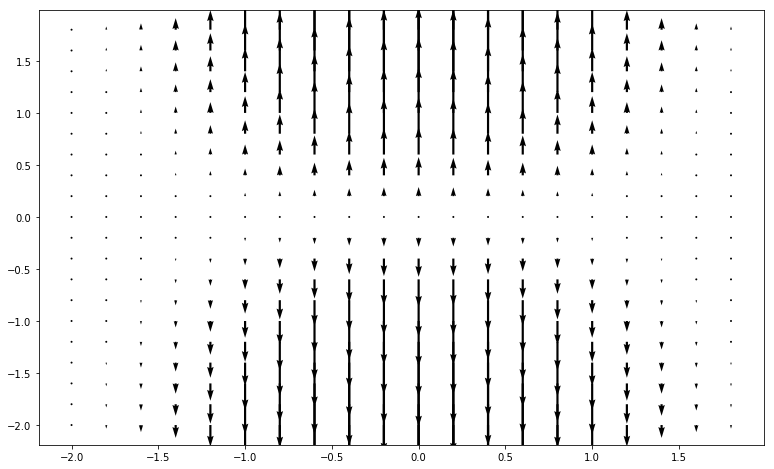

'F = '

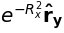

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

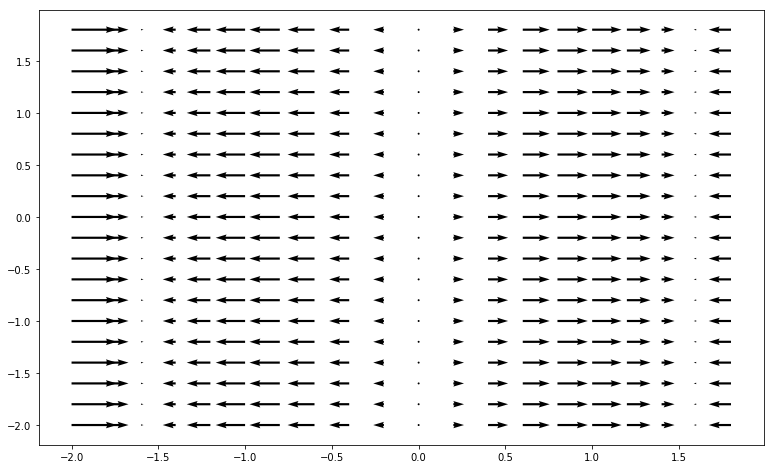

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

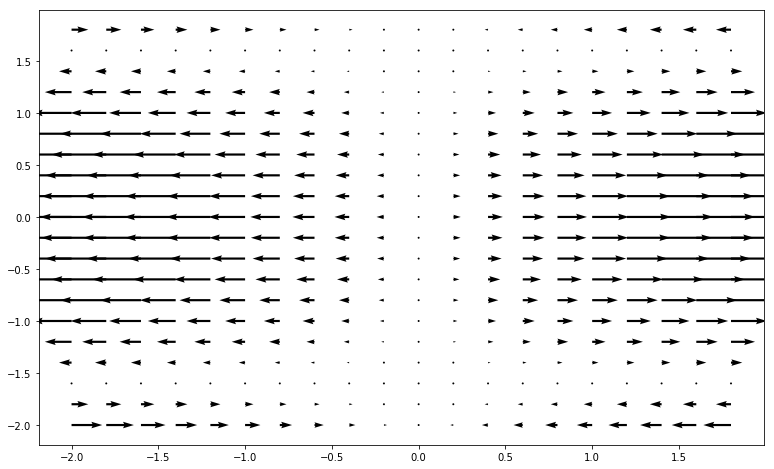

'F = '

'div(F) = '

'curl(F) = '

'div(curl(F)) = '

In [11]:
    ## Set up numeric calculations / lambda funtions
bases = make_bases(x, y)

    ## Set up symbolic calculations
R = ReferenceFrame('R')
x_ = R[0]
y_ = R[1]
bases_sym = make_bases(x_, y_)

for idx, base in enumerate(bases):
        ## Generate graph of each field
        x, y = symbols('x y')
        i_ = lambdify((x, y), base[0])
        j_ = lambdify((x, y), base[1])

        fig = plt.figure(figsize = (13, 8))
        ax = fig.gca()

        i = np.arange(-2, 2, 0.2)
        j = np.arange(-2, 2, 0.2)
        i, j = np.meshgrid(i, j)

        u = i_(i, j) * i
        v = j_(i, j) * j
        ax.quiver(i, j, u, v)

        plt.show()
        
        ## Print textual/symbolic functions & calculations below each graph:
        base = bases_sym[idx]
        i = R.x
        j = R.y
        k = R.z

        X = base[0]
        Y = base[1]

        F = X*i + Y*j

        div_1 = divergence(F, R)
        curl1 = curl(F, R)
        curl2 = 0 * R[0] + 0 * R[1] + curl1 * R[2]
        div_2 = divergence(curl2, R)

        display("F = ", F)
        display("div(F) = ", div_1)
        display("curl(F) = ", curl2)
        display("div(curl(F)) = ", div_2)
